In [2]:
import os
import h5py
import mediapy as media
import matplotlib.pyplot as plt

def load_hdf5(dataset_path):
    if not os.path.isfile(dataset_path):
        print(f'Dataset does not exist at \n{dataset_path}\n')
        exit()

    with h5py.File(dataset_path, 'r') as root:
        qpos = root['/observations/qpos'][()]
        qvel = root['/observations/qvel'][()]
        image_dict = dict()
        for cam_name in root[f'/observations/images/'].keys():
            image_dict[cam_name] = root[f'/observations/images/{cam_name}'][()]
        action = root['/action'][()]

    return qpos, qvel, action, image_dict

In [3]:
# play cam video
data_file = 'data/pick_place_cylinder_box/episode_0.hdf5'
# data_file = 'data/pick_place_cylinder_box/trained.hdf5'
qpos, qvel, action, image_dict = load_hdf5(dataset_path=data_file)
for cam_name, image_list in image_dict.items():
    media.show_video(image_list, fps=30)

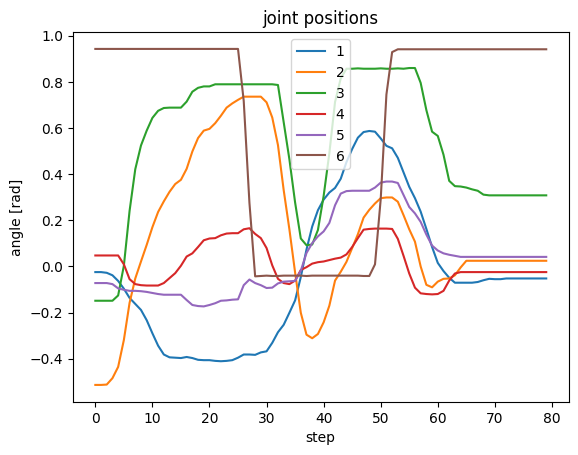

In [5]:
# plot qpos
plt.figure()
plt.plot(qpos, label=list(range(1, 7)))
plt.xlabel('step')
plt.ylabel('angle [rad]')
plt.title('joint positions')
plt.legend()